In [1]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2022-07-12 03:48:25--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2022-07-12 03:48:25--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9e4751618ca39a89abe6933d98.dl.dropboxusercontent.com/cd/0/inline/Bo6rVANPjExMy0xwYWp31R2BpZXbLlVrilSn3klQw8T9o8QaAKlZlmhgcvv6KVePYfDqDSQ7DKMwe6c5AQQTHkfrbglZbADf5dm4yNpomLQ8o9U88iWLeuCnoJIDTbxK16lNDvR0ncPbuh7_gjZyubDHgT6YW6nmNyvT4MPa_VX8nA/file# [following]
--2022-07-12 03:48:26--  https://uc9e4751618ca39a89abe6933d98.dl.dropboxusercontent.com/cd/0/inline/Bo6rVANPjExMy0xwYWp31R2BpZXbLlVrilSn3klQw8T9o8QaAKlZlmhg

In [2]:
!unzip training_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  inflating: training_set/training_set/cats/cat.3719.jpg  
  infl

In [3]:
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

Populating the interactive namespace from numpy and matplotlib


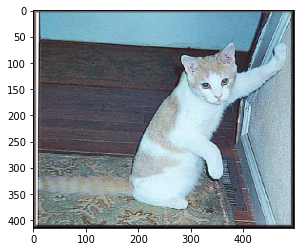

In [11]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as npimg
img=npimg.imread('/content/test_set/test_set/cats/cat.4001.jpg')
imgplot=plt.imshow(img)
plt.show()

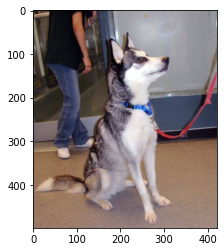

In [5]:
img=npimg.imread('/content/test_set/test_set/dogs/dog.4001.jpg')
imgplot=plt.imshow(img)
plt.show()

In [12]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [13]:
img_width,img_height=150,150
train_data_dir=r'/content/training_set/training_set'
validation_data_dir=r'/content/test_set/test_set'
nb_train_sample=100
nb_validation_sample=100
epochs=5
batch_size=20

In [14]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

In [15]:
train_datagen=ImageDataGenerator(rescale=1. /255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1. /255)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


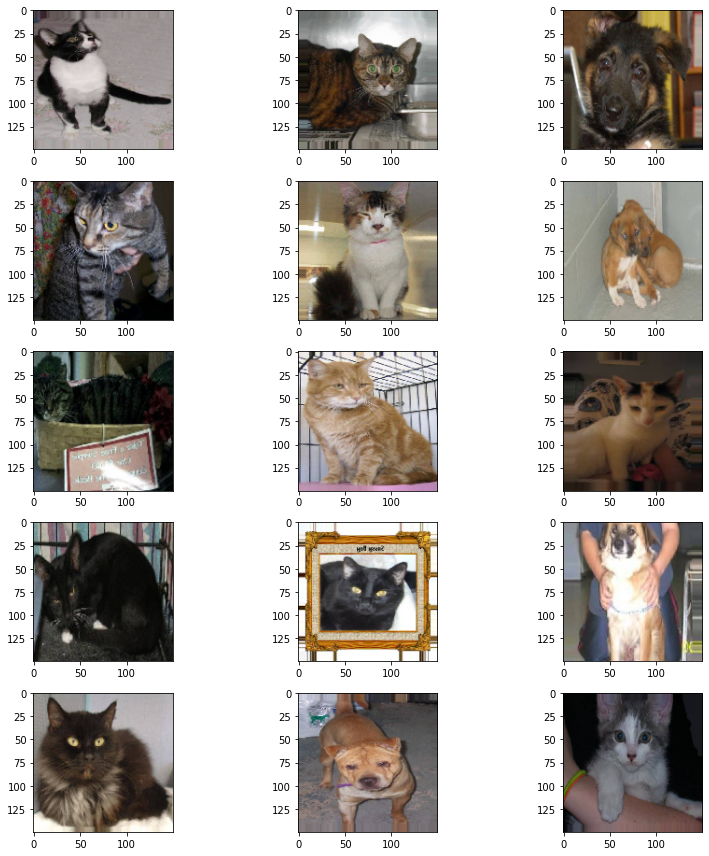

In [16]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for x_batch,y_batch in train_generator:
    image=x_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

In [19]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1))

model.add(Activation('sigmoid'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                      

In [21]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 350464)            0         
                                                                 
 dense_3 (Dense)             (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                      

In [22]:
training=model.fit(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_sample)

Epoch 1/5
100/100 [==============================] - 93s 921ms/step - loss: 3.7697 - accuracy: 0.5105 - val_loss: 0.8407 - val_accuracy: 0.5625
Epoch 2/5
100/100 [==============================] - 91s 909ms/step - loss: 0.7037 - accuracy: 0.5150 - val_loss: 0.6928 - val_accuracy: 0.5015
Epoch 3/5
100/100 [==============================] - 90s 902ms/step - loss: 0.6975 - accuracy: 0.4977 - val_loss: 0.6925 - val_accuracy: 0.4995
Epoch 4/5
100/100 [==============================] - 91s 907ms/step - loss: 0.7023 - accuracy: 0.4940 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/5
100/100 [==============================] - 91s 910ms/step - loss: 0.8650 - accuracy: 0.5105 - val_loss: 0.6919 - val_accuracy: 0.4990


Populating the interactive namespace from numpy and matplotlib
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


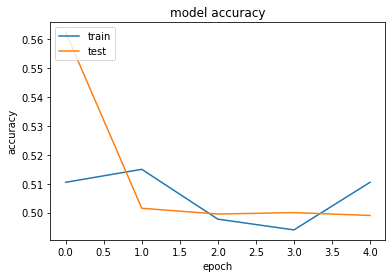

In [23]:
%pylab inline
import matplotlib.pyplot as plt

print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train','test'],loc='upper left')
plt.show()


[[0.4988209]]
Prediction: Cat


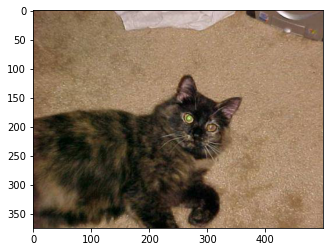

In [26]:
 from tensorflow.keras.preprocessing import image
import pandas as pd
img_pred=image.load_img('/content/test_set/test_set/dogs/dog.4002.jpg',target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

rslt=model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction='Dog'
else:
  prediction='Cat'
print('Prediction:',prediction)

img=npimg.imread('/content/test_set/test_set/cats/cat.4004.jpg')
imgplot=plt.imshow(img)
plt.show()

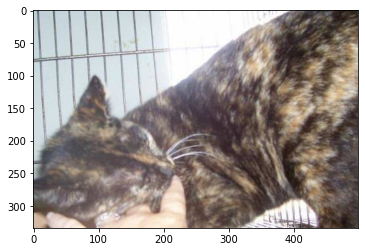

[[0.4988209]]
Prediction: Cat


In [31]:
img=npimg.imread('/content/test_set/test_set/cats/cat.4006.jpg')
imgplot=plt.imshow(img)
plt.show()
print(rslt)
print('Prediction:',prediction)
